In [1]:
#Modules for executing steps of Notebook
import acquire
import explore

In [60]:
#Plotting libraries
import warnings
import matplotlib as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from pylab import rcParams

#Style-settings for Notebook
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [28]:
#Statistic tools for plots and for scoring
from statsmodels.tsa.seasonal import seasonal_decompose

## ACQUIRE/PREP

Acquire the data from the online source at https://ds.codeup.com/fitbit-data.tar.gz

In [4]:
df = acquire.get_data()

In [5]:
df.Date.nunique()

225

Df2 is the prepared data, with no nulls and with all dtypes are numerical

In [6]:
df2 = acquire.clean_data(df)

In [7]:
df2.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2,1347.0,93,0,0,566.0
2018-04-27,3649.0,9971.0,4.70,19,1158.0,219,46,17,1752.0
2018-04-28,3379.0,3521.0,1.66,2,702.0,155,22,11,1124.0
2018-04-29,2851.0,1639.0,0.77,0,891.0,122,0,0,602.0
2018-04-30,2825.0,1323.0,0.62,0,880.0,104,0,0,540.0


Scaled DataFrame if need be

In [8]:
scaled_df = acquire.scale_data(df2)
scaled_df = scaled_df.set_index(df2.index)

# EXPLORE

#### Bird's Eye View of the Dataset

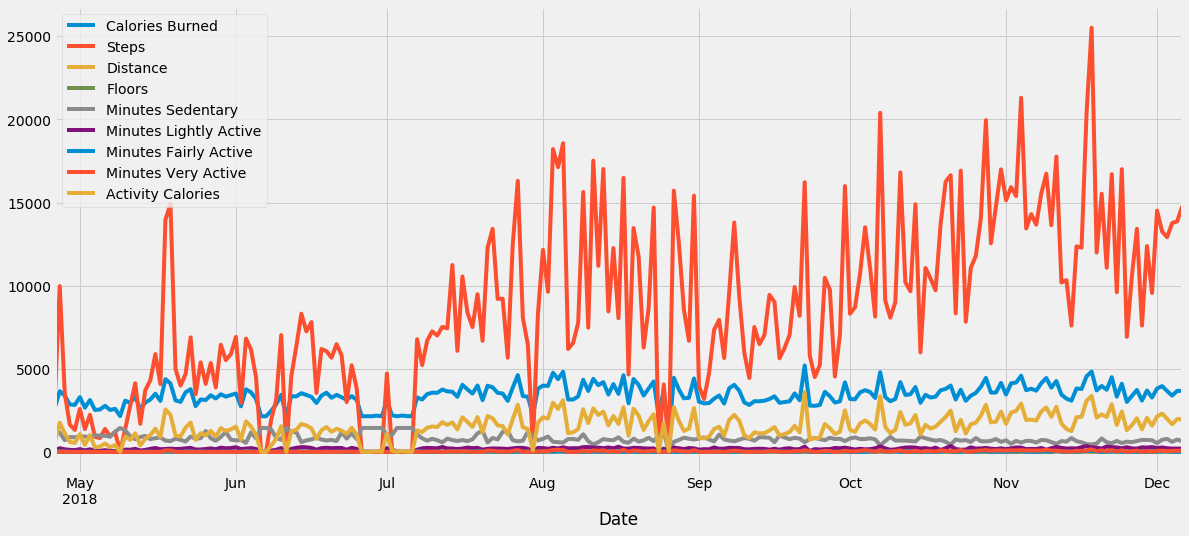

In [84]:
df2.plot()
plt.pyplot.show()

#### Bird's Eye View of the Dataset

#### With scaled data

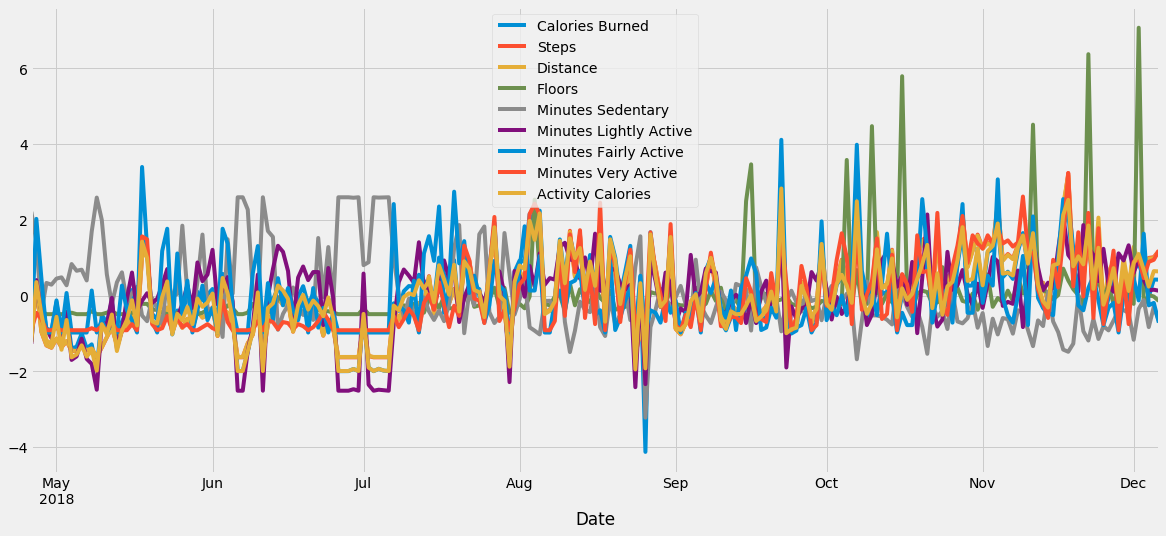

In [10]:
scaled_df.plot()
plt.pyplot.show()

### The day of the EVENT

In [11]:
day_of_event = scaled_df[scaled_df['Calories Burned'] == scaled_df['Calories Burned'].min()]
format_str = '%Y-%m-%d'
blob = day_of_event.index
date_of_event = blob.strftime(format_str)

In [12]:
date_of_event

Index(['2018-08-26'], dtype='object')

In [15]:
event_range = df2['2018-06':'2018-09']

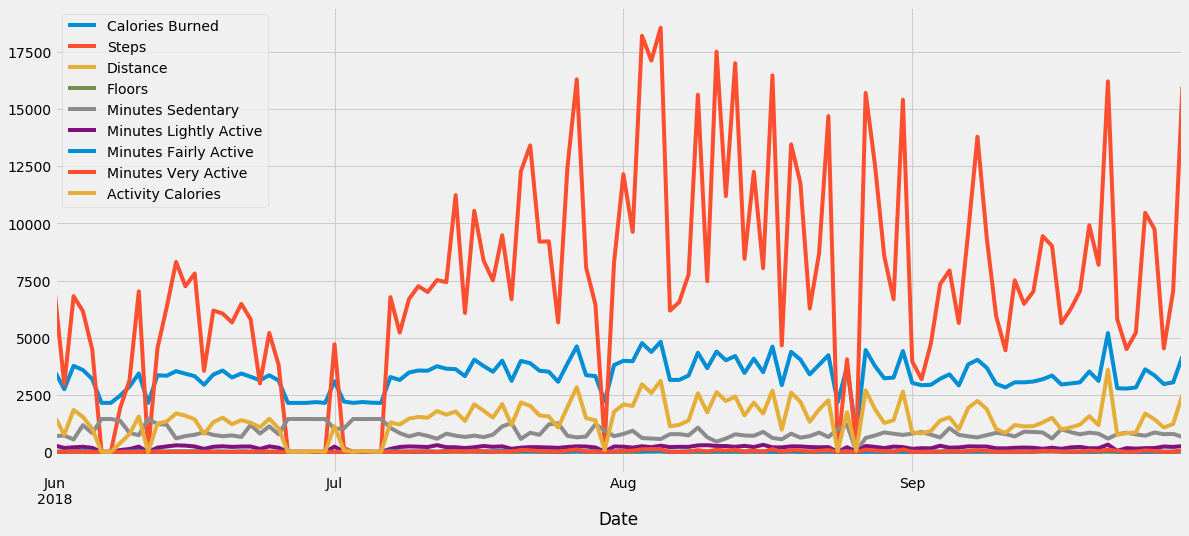

In [65]:
event_range.plot()

In [48]:
#Splitting the time into before and after the speculated event
pre_event = df2[:'2018-07-01']
post_event = df2['2018-07-01':]

In [91]:
#This will be for testing/plotting purposes in a later section
pre_event_with_room = df2[:'2018-08-01']

## Before the event

In [50]:
pre_event.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,3047.820896,4064.955224,1.917164,2.492537,962.880597,152.134328,10.895522,6.223881,954.597015
std,510.418899,3067.709329,1.446857,3.726942,268.292949,82.320677,14.360230,15.878154,581.841332
min,2144.000000,0.000000,0.000000,0.000000,545.000000,0.000000,0.000000,0.000000,0.000000
25%,2701.000000,1511.000000,0.710000,0.000000,746.500000,98.000000,0.000000,0.000000,523.000000
50%,3127.000000,3989.000000,1.880000,1.000000,891.000000,171.000000,5.000000,1.000000,1011.000000
75%,3396.000000,5880.500000,2.770000,3.000000,1182.500000,221.500000,18.000000,6.500000,1368.500000
max,4376.000000,14917.000000,7.040000,19.000000,1440.000000,287.000000,67.000000,92.000000,2549.000000


## After the event

In [51]:
post_event.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3549.157233,10396.251572,4.932704,16.792453,746.125786,203.723270,16.522013,45.308176,1705.597484
std,619.546971,4833.587821,2.310583,29.674623,200.078711,66.318746,15.506567,37.518763,695.647118
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,3157.000000,7038.500000,3.320000,6.000000,634.000000,172.000000,6.000000,11.000000,1276.500000
50%,3553.000000,9719.000000,4.580000,9.000000,716.000000,210.000000,13.000000,42.000000,1684.000000
75%,3936.000000,13780.500000,6.595000,16.000000,816.000000,242.500000,22.500000,76.500000,2114.500000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000


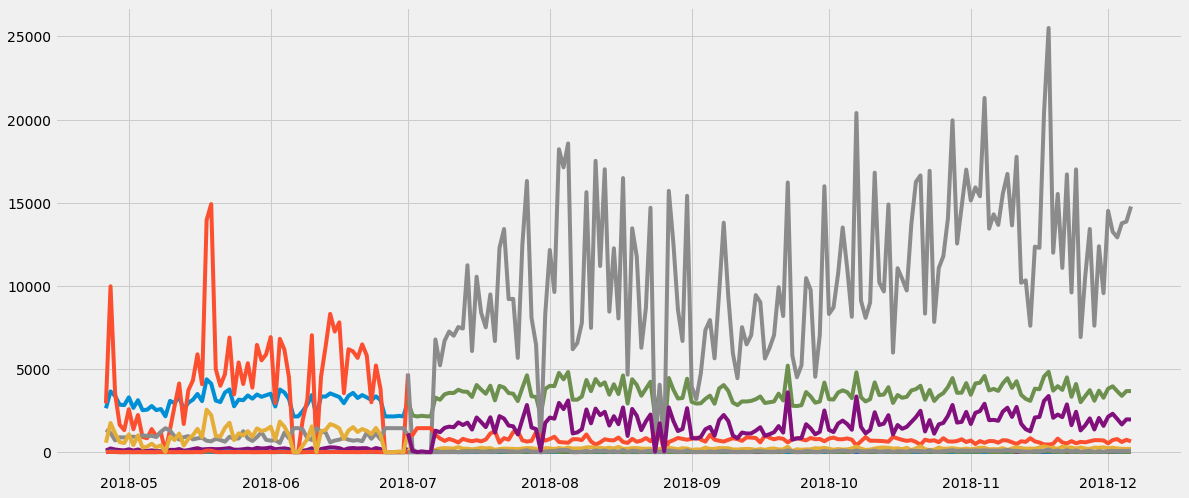

In [82]:
plt.pyplot.plot(pre_event)
plt.pyplot.plot(post_event)
plt.pyplot.show()

    Why the outlier spikes in floors column?

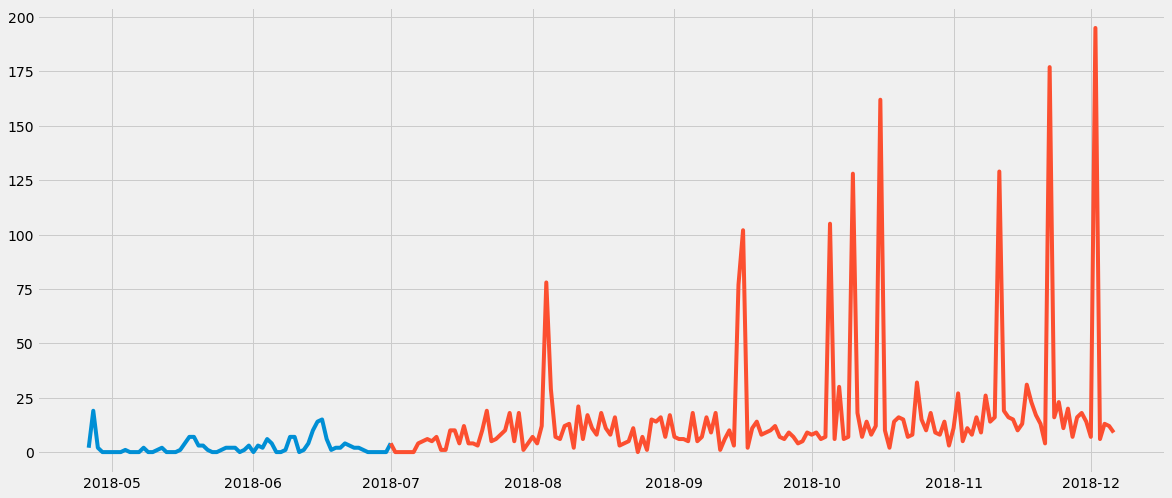

In [113]:
plt.pyplot.plot(pre_event.Floors)
plt.pyplot.plot(post_event.Floors)
plt.pyplot.show()

## Decomposition
### Are trends consitent throughout the timeline?

In [119]:
#The steps is very out of range from the rest of the columns. It's dropped for visual purposes.
all_time = seasonal_decompose(df2.drop('Steps',axis=1), model='additive')

    There looks to be a change in the trend starting at the end of June

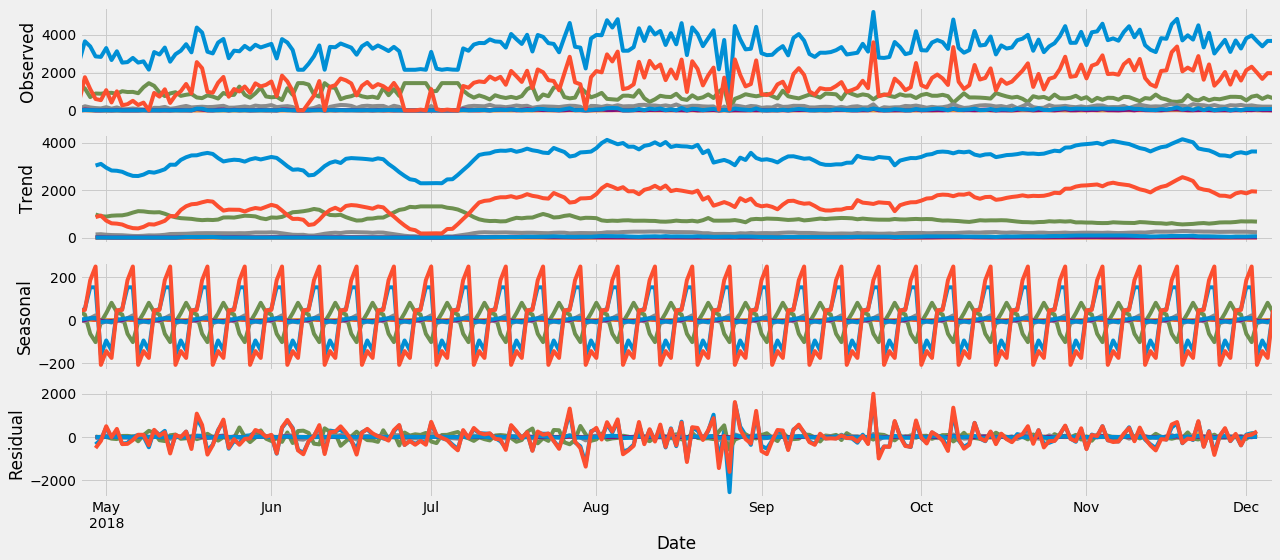

In [115]:
all_time.plot()
plt.pyplot.show()

    Steps has a demonstrable change in trend after The Event

In [118]:
just_steps = seasonal_decompose(df2.Steps, model='additive')

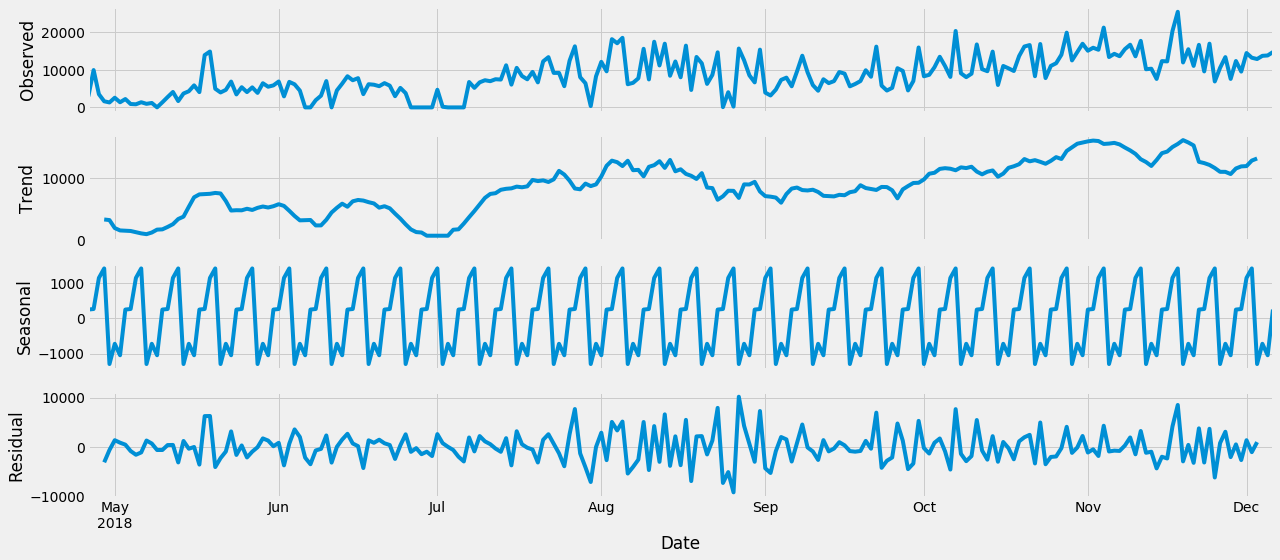

In [120]:
just_steps.trend.plot()
plt.pyplot.show()

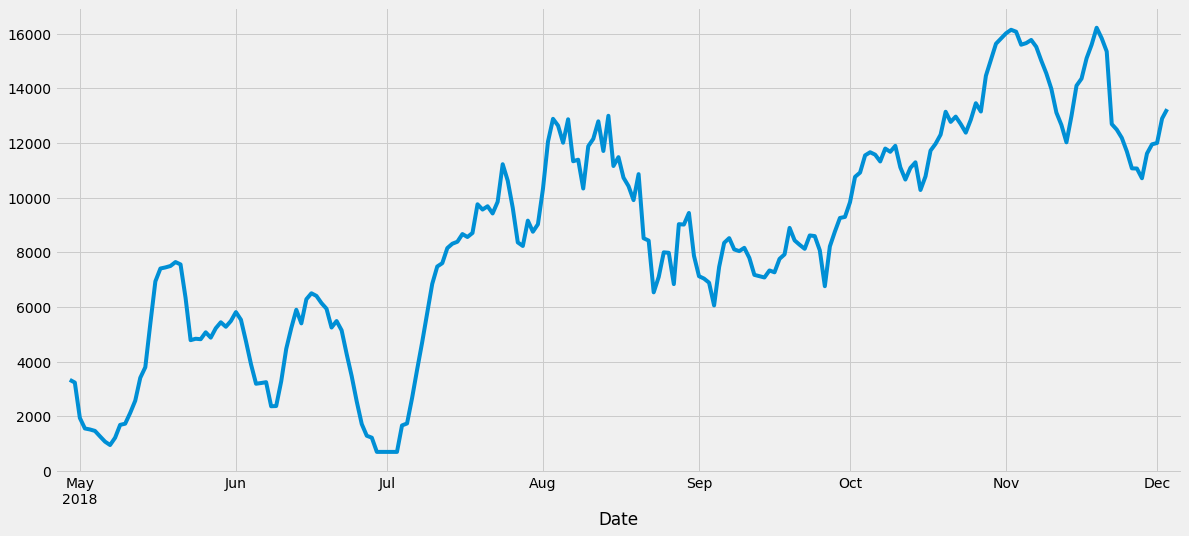

In [135]:
just_steps.trend.plot()
plt.pyplot.show()

Pre-Event

    There is not much change in seasonlity effects or amount of noise before and after The Event.

In [54]:
result = seasonal_decompose(pre_event.drop('Steps',axis=1), model='additive')

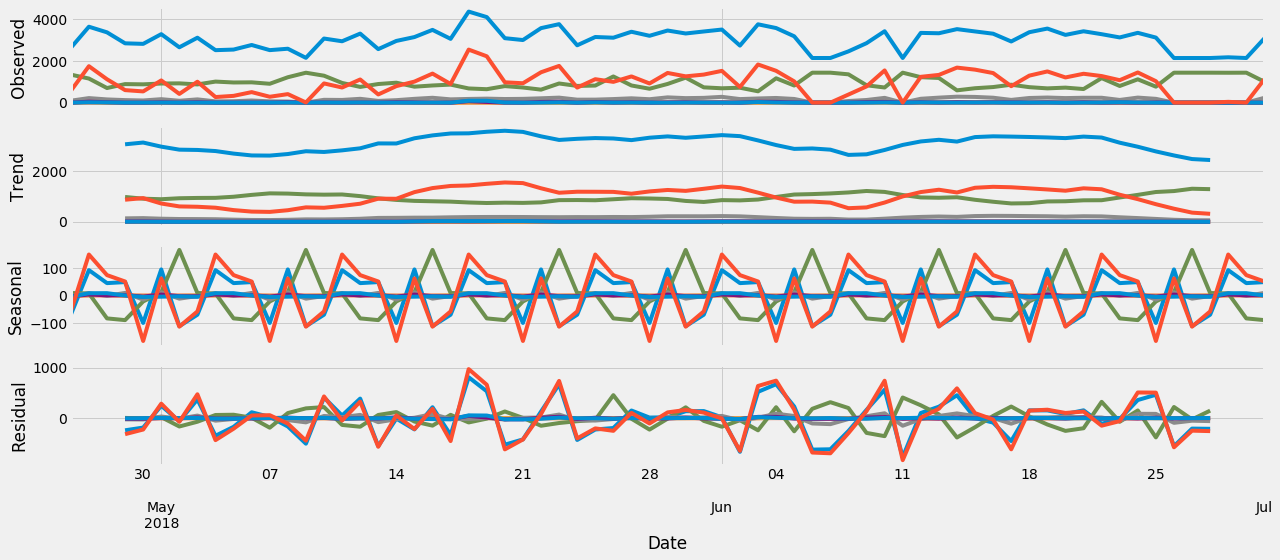

In [55]:
result.plot()
plt.pyplot.show()

Post-Event

    The mean of most columns increase and their variance decreases.

In [56]:
result2 = seasonal_decompose(post_event.drop('Steps',axis=1), model='additive')

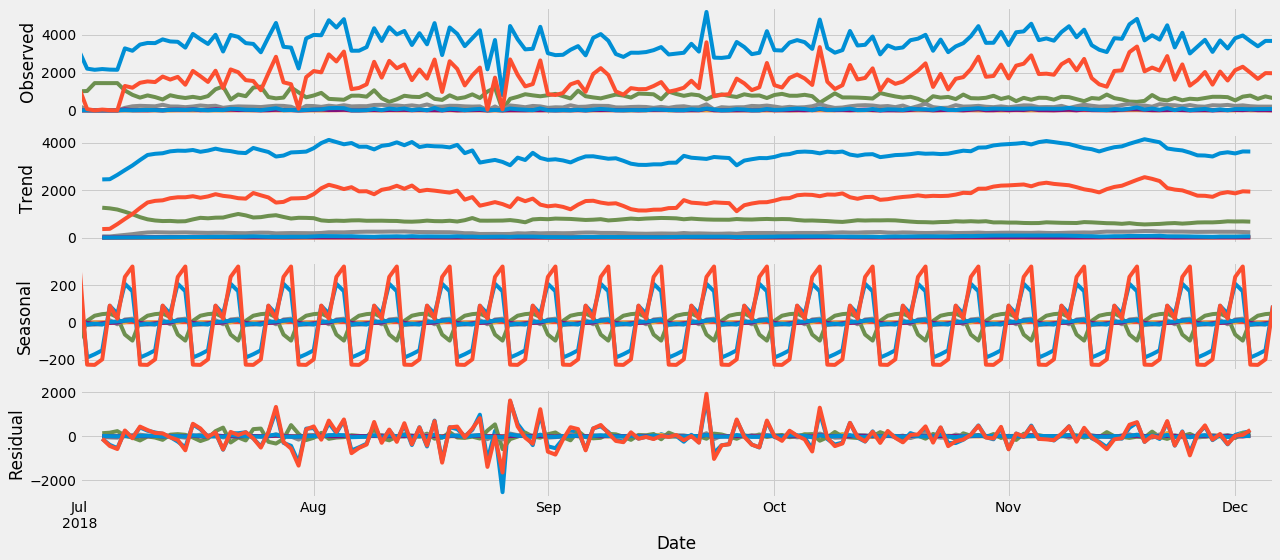

In [57]:
result2.plot()
plt.pyplot.show()

In [78]:
scaled_results = seasonal_decompose(scaled_df.drop('Steps',axis=1), model='additive')

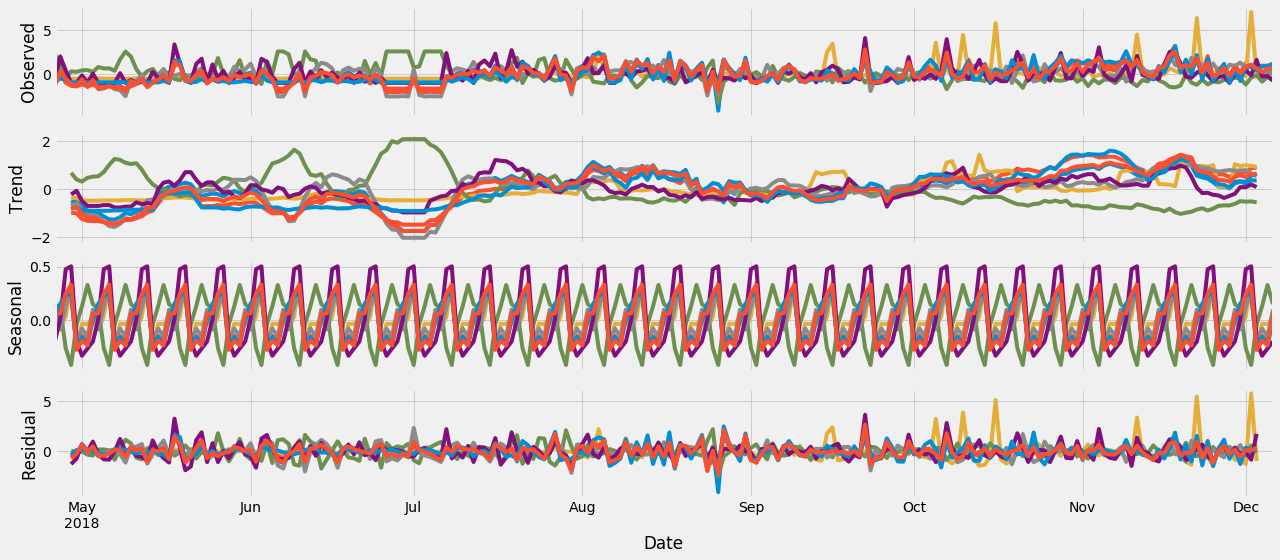

In [79]:
scaled_results.plot()
plt.pyplot.show()

# FORECASTING

### ARIMA model
#### Predicting the 4 Weeks After, using all of the dataset

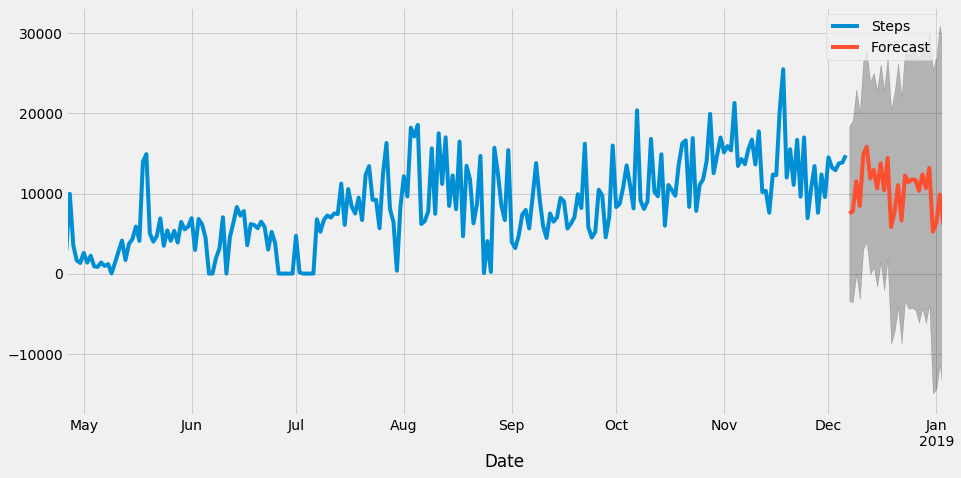

In [112]:
explore.time_predict(df2,'Steps',forecast=True, step_count=28)
plt.pyplot.show()

In [110]:
explore.time_predict(df2,'Steps',stats_info=True, step_count=28)

<<<<<>>>>><|_STATS_INFO_|><<<<<>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1383      0.113      1.221      0.222      -0.084       0.360
ma.L1         -0.8664      0.058    -14.818      0.000      -0.981      -0.752
ar.S.L12      -0.4809      0.090     -5.316      0.000      -0.658      -0.304
sigma2      3.122e+07    4.7e-11   6.65e+17      0.000    3.12e+07    3.12e+07
<<<<<>>>>><|_STATS_INFO_|><<<<<>>>>>
MSE:  25787824.880829714
RMSE: 5078.17


#### Predicting the 4 Weeks After, using data after The Event

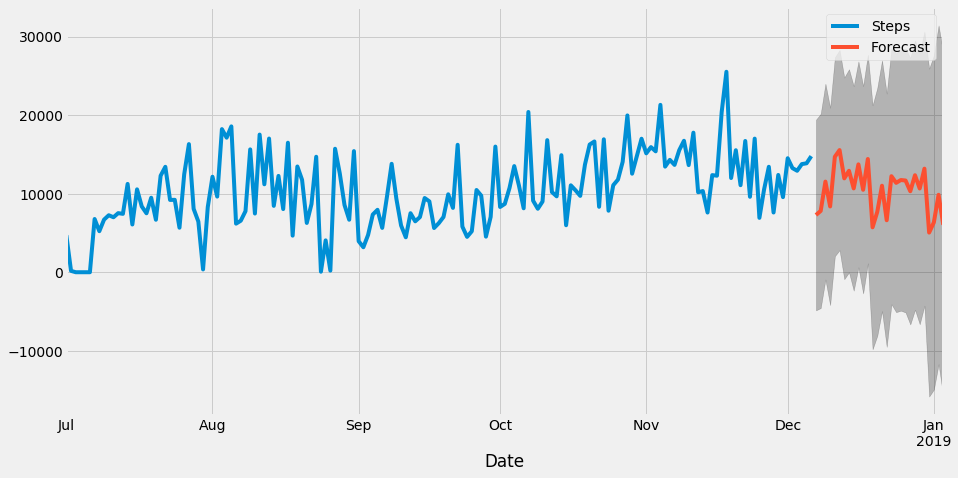

In [111]:
explore.time_predict(post_event,'Steps',forecast=True, step_count=28)

In [109]:
explore.time_predict(post_event,'Steps',stats_info=True, step_count=28)

<<<<<>>>>><|_STATS_INFO_|><<<<<>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0778      0.142      0.548      0.584      -0.201       0.356
ma.L1         -0.8840      0.064    -13.744      0.000      -1.010      -0.758
ar.S.L12      -0.4631      0.126     -3.675      0.000      -0.710      -0.216
sigma2      3.834e+07   3.88e-10   9.88e+16      0.000    3.83e+07    3.83e+07
<<<<<>>>>><|_STATS_INFO_|><<<<<>>>>>
MSE:  25551815.561374128
RMSE: 5054.88


#### Predicting the 2 Weeks After the Event

In [99]:
df2.columns

Index(['Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories'],
      dtype='object')

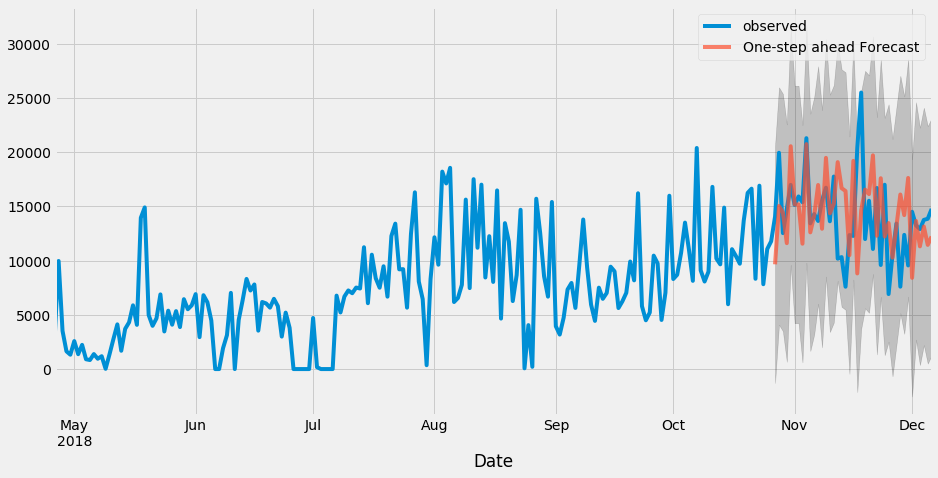

In [125]:
explore.time_predict(df2,'Steps',process_info=True, step_count=28)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

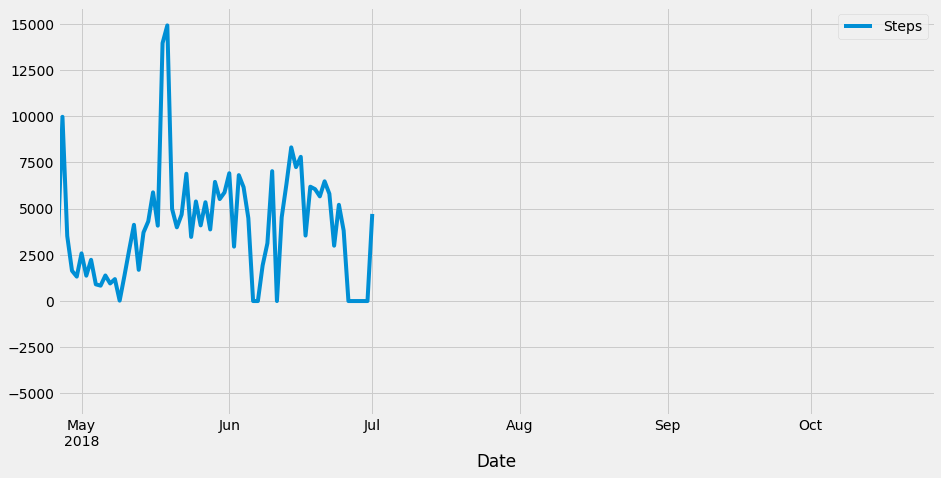

In [132]:
explore.time_predict(pre_event,'Steps',process_info=True, start_date=)

In [133]:
pre_event.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2018-04-26 to 2018-07-01
Data columns (total 9 columns):
Calories Burned           67 non-null float64
Steps                     67 non-null float64
Distance                  67 non-null float64
Floors                    67 non-null int64
Minutes Sedentary         67 non-null float64
Minutes Lightly Active    67 non-null int64
Minutes Fairly Active     67 non-null int64
Minutes Very Active       67 non-null int64
Activity Calories         67 non-null float64
dtypes: float64(5), int64(4)
memory usage: 5.2 KB


In [134]:
post_event.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2018-07-01 to 2018-12-06
Data columns (total 9 columns):
Calories Burned           159 non-null float64
Steps                     159 non-null float64
Distance                  159 non-null float64
Floors                    159 non-null int64
Minutes Sedentary         159 non-null float64
Minutes Lightly Active    159 non-null int64
Minutes Fairly Active     159 non-null int64
Minutes Very Active       159 non-null int64
Activity Calories         159 non-null float64
dtypes: float64(5), int64(4)
memory usage: 12.4 KB
